# Regressão Logística

Neste trabalho, você implementará a regressão logística e a aplicará a dois conjuntos de dados diferentes.

# Sumário
- [ 1 - Pacotes ](#1)
- [ 2 - Regressão Logística](#2)
  - [ 2.1 Declaração do Problema](#2.1)
  - [ 2.2 Carregamento e visualização dos dados](#2.2)
  - [ 2.3 Função Sigmoide](#2.3)
  - [ 2.4 Função de Custo para Regressão Logística](#2.4)
  - [ 2.5 Gradiente para Regressão Logística](#2.5)
  - [ 2.6 Aprendizagem de parâmetros usando o gradiente descendente ](#2.6)
  - [ 2.7 Plotagem da Fronteira de Decisão](#2.7)
  - [ 2.8 Avaliação da Regressão Logística](#2.8)
- [ 3 - Regressão Logística Regularizada](#3)
  - [ 3.1 Declaração do Problema](#3.1)
  - [ 3.2 Carregamento e visualização dos dados](#3.2)
  - [ 3.3 Mapeamento de Features](#3.3)
  - [ 3.4 Função de Custo para Regressão Logística Regularizada](#3.4)
  - [ 3.5 Gradiente para Regressão Logística Regularizada](#3.5)
  - [ 3.6 Aprendizagem de parâmetros usando o gradiente descendente](#3.6)
  - [ 3.7 Plotagem da Fronteira de Decisão](#3.7)
  - [ 3.8 Avaliação do modelo de Regressão Logística Regularizada](#3.8)


**NOTA:** Para evitar erros do corretor automático, é apenas permitido editar os código com o comentário no início `# GRADED FUNCTION` (que são, efetivamente, os 6 códigos que você deve preencher)

<a name="1"></a>
## 1 - Pacotes 

Primeiro, vamos executar a célula abaixo para importar todos os pacotes de que você precisará durante esta tarefa.
- [numpy](www.numpy.org) é o pacote fundamental para computação científica com Python.
- [matplotlib](http://matplotlib.org) é uma biblioteca famosa para plotar gráficos em Python.
-  ``utils.py`` contém funções auxiliares para esta tarefa. Você não precisa modificar o código neste arquivo.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

%matplotlib inline

<a name="2"></a>
## 2 - Regressão Logística

Nesta parte do exercício, você construirá um modelo de regressão logística para prever se um estudante será admitido numa universidade.

<a name="2.1"></a>
### 2.1 Declaração do Problema

Suponha que você seja o administrador de um departamento universitário e queira determinar a chance de admissão de cada candidato com base nos seus resultados em dois exames. 
* Você tem dados históricos de candidatos anteriores que pode usar como um conjunto de treinamento para regressão logística. 
* Para cada exemplo de treinamento, você tem as notas do candidato em dois exames e a decisão de admissão. 
* Sua tarefa é construir um modelo de classificação que estime a probabilidade de admissão de um candidato com base nas notas desses dois exames. 

<a name="2.2"></a>
### 2.2 Carregamento e visualização dos dados

Você começará carregando o conjunto de dados para esta tarefa. 
- A função `load_data()` mostrada abaixo carrega os dados nas variáveis `X_train` e `y_train`
  - `X_train` contém as notas em dois exames para um estudante
  - `y_train` é a decisão de admissão 
      - `y_train = 1` se o estudante foi admitido 
      - `y_train = 0` se o estudante não foi admitido 
  - Tanto `X_train` quanto `y_train` são arrays numpy.


In [5]:
# carregar conjunto de dados
X_train, y_train = load_data("data/ex2data1.txt")

#### Visualizar as variáveis
Vamos nos familiarizar mais com o seu conjunto de dados.  
- Um bom ponto de partida é simplesmente imprimir cada variável e ver o que ela contém.

O código abaixo imprime os primeiros cinco valores de `X_train` e o tipo da variável.

In [6]:
print("Os primeiros cinco elementos em X_train são:\n", X_train[:5])
print("Tipo de X_train:",type(X_train))

Os primeiros cinco elementos em X_train são:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Tipo de X_train: <class 'numpy.ndarray'>


Agora imprima os primeiros cinco valores de `y_train`

In [7]:
print("Os primeiros cinco elementos em y_train são:\n", y_train[:5])
print("Tipo de y_train:",type(y_train))

Os primeiros cinco elementos em y_train são:
 [0. 0. 0. 1. 1.]
Tipo de y_train: <class 'numpy.ndarray'>


#### Verificar as dimensões das suas variáveis

Outra forma útil de se familiarizar com seus dados é visualizar suas dimensões. Vamos imprimir o formato de `X_train` e `y_train` e ver quantos exemplos de treinamento temos em nosso conjunto de dados.

In [8]:
print ('O formato de X_train é: ' + str(X_train.shape))
print ('O formato de y_train é: ' + str(y_train.shape))
print ('Temos m = %d exemplos de treinamento' % (len(y_train)))

O formato de X_train é: (100, 2)
O formato de y_train é: (100,)
Temos m = 100 exemplos de treinamento


#### Visualizar seus dados

Antes de começar a implementar qualquer algoritmo de aprendizagem, é sempre bom visualizar os dados, se possível.
- O código abaixo exibe os dados num gráfico 2D (como mostrado abaixo), onde os eixos são as notas dos dois exames, e os exemplos positivos e negativos são mostrados com marcadores diferentes.
- Usamos uma função auxiliar no arquivo ``utils.py`` para gerar este gráfico. 

<img src="images/figure 1.png" width="450" height="450">



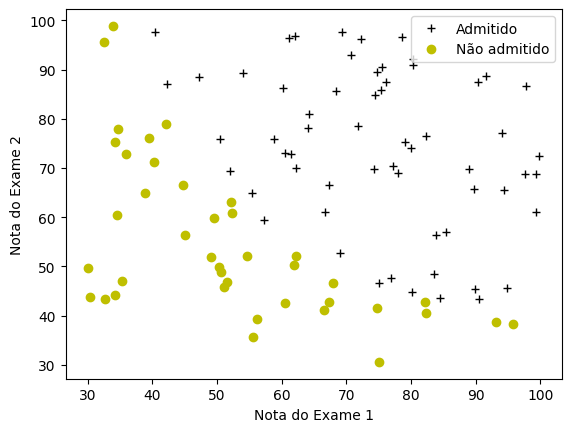

In [9]:
# Plotar exemplos
plot_data(X_train, y_train[:], pos_label="Admitido", neg_label="Não admitido")

# Definir o rótulo do eixo y
plt.ylabel('Nota do Exame 2') 
# Definir o rótulo do eixo x
plt.xlabel('Nota do Exame 1') 
plt.legend(loc="upper right")
plt.show()

Seu objetivo é construir um modelo de regressão logística para ajustar estes dados.
- Com este modelo, você pode então prever se um novo estudante será admitido com base nas suas notas nos dois exames.

<a name="2.3"></a>
### 2.3 Função Sigmoide

Lembre-se de que para a regressão logística, o modelo é representado como

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
onde a função $g$ é a função sigmoide. A função sigmoide é definida como:

$$g(z) = \frac{1}{1+e^{-z}}$$

Vamos implementar a função sigmoide primeiro, para que possa ser usada no resto desta tarefa.

<a name='ex-01'></a>
### Exercício 1
Por favor, complete a função `sigmoid` para calcular

$$g(z) = \frac{1}{1+e^{-z}}$$

Note que 
- `z` nem sempre é um único número, mas também pode ser um array de números. 
- Se a entrada for um array de números, gostaríamos de aplicar a função sigmoide a cada valor no array de entrada.


In [10]:
# UNQ_C1
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Calcula o sigmoide de z

    Args:
        z (ndarray): Um escalar, array numpy de qualquer tamanho.

    Returns:
        g (ndarray): sigmoid(z), com o mesmo formato que z
         
    """
          
    ### START CODE HERE ###

    g = 1 / (1 + np.exp(-z)) 
    
    ### END SOLUTION ###  
    
    return g

Quando terminar, tente testar alguns valores chamando `sigmoid(x)` na célula abaixo. 
- Para valores grandes e positivos de x, o sigmoide deve estar perto de 1, enquanto para valores grandes e negativos, o sigmoide deve estar perto de 0. 
- Avaliar `sigmoid(0)` deve dar exatamente 0.5. 


In [31]:
# Nota: Você pode editar este valor
value = 0

print (f"sigmoid({value}) = {sigmoid(value)}")

sigmoid(0) = 0.5


**Saída Esperada**:
<table>
  <tr>
    <td> <b>sigmoid(0)<b></td>
    <td> 0.5 </td> 
  </tr>
</table>
    
- Como mencionado antes, seu código também deve funcionar com vetores e matrizes. Para uma matriz, sua função deve executar a função sigmoide em cada elemento.

In [32]:
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

# UNIT TESTS
from public_tests import *
sigmoid_test(sigmoid)

sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]
All tests passed!


**Saída Esperada**:
<table>
  <tr>
    <td><b>sigmoid([-1, 0, 1, 2])<b></td> 
    <td>[0.26894142        0.5           0.73105858        0.88079708]</td> 
  </tr>    
  
</table>

<a name="2.4"></a>
### 2.4 Função de Custo para Regressão Logística

Nesta seção, você implementará a função de custo para regressão logística.

<a name='ex-02'></a>
### Exercício 2

Por favor, complete a função `compute_cost` usando as equações abaixo.

Lembre-se que para a regressão logística, a função de custo tem a forma 

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

onde
* m é o número de exemplos de treinamento no conjunto de dados


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ é o custo para um único ponto de dados, que é - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
* $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ é a previsão do modelo, enquanto $y^{(i)}$, que é o rótulo real

* $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ onde a função $g$ é a função sigmoide.
    * Pode ser útil calcular primeiro uma variável intermediária $z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b = w_0x^{(i)}_0 + ... + w_{n-1}x^{(i)}_{n-1} + b$ onde $n$ é o número de features, antes de calcular $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$

Nota:
* Ao fazer isso, lembre-se de que as variáveis `X_train` e `y_train` não são valores escalares, mas sim matrizes de formato ($m, n$) e ($𝑚$,1) respetivamente, onde $𝑛$ é o número de features e $𝑚$ é o número de exemplos de treinamento.
* Você pode usar a função sigmoide que implementou acima para esta parte.


In [ ]:
# UNQ_C2
# GRADED FUNCTION: compute_cost
def compute_cost(X, y, w, b, *argv):
    """
    Calcula o custo sobre todos os exemplos
    Args:
      X : (ndarray Shape (m,n)) dados, m exemplos por n features
      y : (ndarray Shape (m,))  valor alvo 
      w : (ndarray Shape (n,))  valores dos parâmetros do modelo      
      b : (scalar)              valor do parâmetro de bias do modelo
      *argv : não usado, para compatibilidade com a versão regularizada abaixo
    Returns:
      total_cost : (scalar) custo 
    """

    m, n = X.shape
    
    ### START CODE HERE ###
    
    
        
        
            
        
        
        
        
    
    ### END CODE HERE ### 

    return total_cost

<details>
<summary><font size="3" color="darkgreen"><b>Clique para ver as dicas</b></font></summary>
    
* Você pode representar um operador de somatório eg: $h = \sum\limits_{i = 0}^{m-1} 2i$ em código da seguinte forma:

```python
    h = 0
    for i in range(m):
        h = h + 2*i
```
<br>

* Neste caso, você pode iterar sobre todos os exemplos em `X` usando um loop for e adicionar a `loss` de cada iteração a uma variável (`loss_sum`) inicializada fora do loop.

* Em seguida, você pode retornar o `total_cost` como `loss_sum` dividido por `m`.

* Se você é novo no Python, verifique se o seu código está corretamente indentado com espaços ou tabulações consistentes. Caso contrário, pode produzir uma saída diferente ou gerar um erro `IndentationError: unexpected indent`. 
     
</details>

Execute as células abaixo para verificar a sua implementação da função `compute_cost` com duas inicializações diferentes dos parâmetros $w$ e $b$

In [ ]:
m, n = X_train.shape

# Calcular e exibir o custo com w e b inicializados a zeros
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Custo em w e b iniciais (zeros): {:.3f}'.format(cost))

**Saída Esperada**:
<table>
  <tr>
    <td> <b>Custo em w e b iniciais (zeros)<b></td>
    <td> 0.693 </td> 
  </tr>
</table>

In [ ]:
# Calcular e exibir o custo com w e b não nulos
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Custo em w e b de teste (não nulos): {:.3f}'.format(cost))


# UNIT TESTS
compute_cost_test(compute_cost)

**Saída Esperada**:
<table>
  <tr>
    <td> <b>Custo em w e b de teste (não nulos):<b></td>
    <td> 0.218 </td> 
  </tr>
</table>

<a name="2.5"></a>
### 2.5 Gradiente para Regressão Logística

Nesta seção, você implementará o gradiente para regressão logística.

Lembre-se de que o algoritmo do gradiente descendente é:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

onde, os parâmetros $b$, $w_j$ são todos atualizados simultaneamente


<a name='ex-03'></a>
### Exercício 3

Por favor, complete a função `compute_gradient` para calcular $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ a partir das equações (2) e (3) abaixo.

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m é o número de exemplos de treinamento no conjunto de dados

    
* $f_{\mathbf{w},b}(x^{(i)})$ é a previsão do modelo, enquanto $y^{(i)}$ é o rótulo real


- **Nota**: Embora este gradiente pareça idêntico ao gradiente da regressão linear, a fórmula é na verdade diferente porque a regressão linear e a logística têm diferentes definições de $f_{\mathbf{w},b}(x).$

Como antes, você pode usar a função sigmoide que implementou acima.

In [ ]:
# UNQ_C3
# GRADED FUNCTION: compute_gradient
def compute_gradient(X, y, w, b, *argv): 
    """
    Calcula o gradiente para regressão logística 
 
    Args:
      X : (ndarray Shape (m,n)) dados, m exemplos por n features
      y : (ndarray Shape (m,))  valor alvo 
      w : (ndarray Shape (n,))  valores dos parâmetros do modelo      
      b : (scalar)              valor do parâmetro de bias do modelo
      *argv : não usado, para compatibilidade com a versão regularizada abaixo
    Returns
      dj_dw : (ndarray Shape (n,)) O gradiente do custo em relação aos parâmetros w. 
      dj_db : (scalar)             O gradiente do custo em relação ao parâmetro b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ### 
    for i in range(m):
        z_wb = None
        for j in range(n): 
            z_wb += None
        z_wb += None
        f_wb = None
        
        dj_db_i = None
        dj_db += None
        
        for j in range(n):
            dj_dw[j] = None
            
    dj_dw = None
    dj_db = None
    ### END CODE HERE ###

        
    return dj_db, dj_dw

Execute as células abaixo para verificar a sua implementação da função `compute_gradient` com duas inicializações diferentes dos parâmetros $w$ e $b$

In [ ]:
# Calcular e exibir o gradiente com w e b inicializados a zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db em w e b iniciais (zeros):{dj_db}' )
print(f'dj_dw em w e b iniciais (zeros):{dj_dw.tolist()}' )

**Saída Esperada**:
<table>
  <tr>
    <td> <b>dj_db em w e b iniciais (zeros)<b></td>
    <td> -0.1 </td> 
  </tr>
  <tr>
    <td> <b>dj_dw em w e b iniciais (zeros):<b></td>
    <td> [-12.00921658929115, -11.262842205513591] </td> 
  </tr>
</table>

In [ ]:
# Calcular e exibir o custo e o gradiente com w e b não nulos
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db em w e b de teste:', dj_db)
print('dj_dw em w e b de teste:', dj_dw.tolist())

# UNIT TESTS 
compute_gradient_test(compute_gradient)

**Saída Esperada**:
<table>
  <tr>
    <td> <b>dj_db em w e b de teste (não nulos)<b></td>
    <td> -0.5999999999991071 </td> 
  </tr>
  <tr>
    <td> <b>dj_dw em w e b de teste (não nulos):<b></td>
    <td> [-44.8313536178737957, -44.37384124953978] </td> 
  </tr>
</table>

<a name="2.6"></a>
### 2.6 Aprendizagem de parâmetros usando o gradiente descendente 

Semelhante à tarefa anterior, agora você encontrará os parâmetros ótimos de um modelo de regressão logística usando o gradiente descendente. 
- Você não precisa implementar nada para esta parte. Simplesmente execute as células abaixo. 

- Uma boa maneira de verificar se o gradiente descendente está a funcionar corretamente é observar o valor de $J(\mathbf{w},b)$ e verificar se está a diminuir a cada passo. 

- Assumindo que você implementou o gradiente e calculou o custo corretamente, o seu valor de $J(\mathbf{w},b)$ nunca deve aumentar e deve convergir para um valor estável no final do algoritmo.

In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Executa o gradiente descendente em lote para aprender theta. Atualiza theta dando 
    num_iters passos do gradiente com taxa de aprendizagem alpha
 
    Args:
      X : (ndarray Shape (m, n) dados, m exemplos por n features
      y : (ndarray Shape (m,)) valor alvo 
      w_in : (ndarray Shape (n,)) Valores iniciais dos parâmetros do modelo
      b_in : (scalar) Valor inicial do parâmetro do modelo
      cost_function : função para calcular o custo
      gradient_function : função para calcular o gradiente
      alpha : (float) Taxa de aprendizagem
      num_iters : (int) número de iterações para executar o gradiente descendente
      lambda_ : (scalar, float) constante de regularização
 
    Returns:
      w : (ndarray Shape (n,)) Valores atualizados dos parâmetros do modelo após
      executar o gradiente descendente
      b : (scalar) Valor atualizado do parâmetro do modelo após
      executar o gradiente descendente
    """
 
    # número de exemplos de treinamento
    m = len(X)
 
    # Um array para armazenar o custo J e os w's em cada iteração, principalmente para gráficos posteriores
    J_history = []
    w_history = []
 
    for i in range(num_iters):

        # Calcular o gradiente e atualizar os parâmetros
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_) 

        # Atualizar Parâmetros usando w, b, alpha e gradiente
        w_in = w_in - alpha * dj_dw 
        b_in = b_in - alpha * dj_db 
 
        # Salvar custo J em cada iteração
        if i<100000: # prevenir o esgotamento de recursos 
            cost = cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Imprimir o custo a cada intervalo de 10 vezes ou tantas iterações se for < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f} ")
 
    return w_in, b_in, J_history, w_history # retornar w e o histórico de J,w para gráficos

Agora, vamos executar o algoritmo de gradiente descendente acima para aprender os parâmetros para o nosso conjunto de dados.

**Nota**
O bloco de código abaixo demora alguns minutos a ser executado, especialmente com uma versão não-vetorizada. Você pode reduzir as `iterations` para testar a sua implementação e iterar mais rapidamente. Se tiver tempo mais tarde, tente executar 100.000 iterações para obter melhores resultados.

In [ ]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Algumas configurações do gradiente descendente
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

<details>
<summary>
 <b>Saída Esperada: Custo 0.30, (Clique para ver detalhes):</b>
</summary>

 # With the following settings
    np.random.seed(1)
    initial_w = 0.01 * (np.random.rand(2) - 0.5)
    initial_b = -8
    iterations = 10000
    alpha = 0.001
    #

```
Iteration    0: Cost     0.96   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   
```
</details>

<a name="2.7"></a>
### 2.7 Plotagem da Fronteira de Decisão

Agora, a fronteira de decisão aprendida é plotada sobre os dados. 
Assumindo que você implementou corretamente, você deve ver uma fronteira que separa aproximadamente os exemplos positivos dos negativos. 

<img src="images/figure 2.png" width="450" height="450">


In [ ]:
# Plotar a fronteira de decisão
plot_decision_boundary(w, b, X_train, y_train)

# Adicionar rótulos
plt.ylabel('Nota do Exame 2') 
plt.xlabel('Nota do Exame 1') 
plt.legend(loc="upper right")
plt.show()

<a name="2.8"></a>
### 2.8 Avaliação da Regressão Logística

Depois de aprender os parâmetros, você pode usar o modelo para prever se um determinado estudante será admitido.

Você irá implementar a função `predict` abaixo para fazer isso.


<a name='ex-04'></a>
### Exercício 4

Complete a função `predict` para produzir predições `1` ou `0` dada um conjunto de dados e parâmetros aprendidos $w$ e $b$.
- Primeiro, você precisa computar a predição a partir do modelo $f(x^{(i)}) = g(w \cdot x^{(i)} + b)$ para cada exemplo 
    - Você já implementou isso antes nas partes acima
- Interpretamos a saída do modelo ($f(x^{(i)})$) como a probabilidade de que $y^{(i)}=1$ dado $x^{(i)}$ e parametrizado por $w$.
- Portanto, para obter a predição final ($y^{(i)}=0$ ou $y^{(i)}=1$) a partir do modelo de regressão logística, você pode usar a seguinte heurística -

  se $f(x^{(i)}) >= 0.5$, predizer $y^{(i)}=1$
  
  se $f(x^{(i)}) < 0.5$, predizer $y^{(i)}=0$


In [ ]:
# UNQ_C4
# GRADED FUNCTION: predict
def predict(X, w, b):
    """
    Prevê se o rótulo é 0 ou 1 usando parâmetros de regressão logística aprendidos (w, b)
    
    Args:
      X : (ndarray Shape (m,n)) dados, m exemplos por n features
      w : (ndarray Shape (n,)) valores dos parâmetros do modelo      
      b : (scalar) valor do parâmetro de bias do modelo
    
    Returns:
      p : (ndarray (m,1)) Vetor de previsões (0 ou 1)
    """
    # número de exemplos de treinamento
    m, n = X.shape   
    p = np.zeros(m) 
   
    ### START CODE HERE ### 
    # Loop sobre cada exemplo
    for i in range(m):   
        z_wb = None
        # Loop sobre cada feature
        for j in range(n): 
            # Adicionar o termo correspondente a z_wb
            z_wb += None
        
        # Adicionar o termo de bias 
        z_wb += None
        
        # Calcular a predicao para esse exemplo
        f_wb = None

        # Aplicar o threshold
        p[i] = None
        
    ### END CODE HERE ### 
    return p   

Agora vamos testar sua função de previsão e ver a precisão do seu modelo no conjunto de treinamento.

In [ ]:
# Teste seu codigo de predicao
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

# UNIT TESTS        
predict_test(predict)

**Saída esperada** 

<table>
  <tr>
    <td> <b>Output of predict: shape (4,),value [0. 1. 1. 1.]<b></td>
  </tr>
</table>

Agora vamos usar isso para calcular a acurácia do conjunto de treinamento

In [ ]:
#Calcula a acurácia do nosso conjunto de treinamento
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

<table>
  <tr>
    <td> <b>Train Accuracy (approx):<b></td>
    <td> 92.00 </td> 
  </tr>
</table>

## 3 - Regressão Logística Regularizada

Nesta parte do exercício, você implementará a regressão logística regularizada para prever se microchips de uma fábrica passam no controle de qualidade (QC).
Muitas vezes, a regressão logística com regularização ajuda a evitar o **overfitting** (sobreajuste).

<a name="3.1"></a>
### 3.1 Declaração do Problema

Suponha que você seja o gerente de produto de uma fábrica de microchips e tenha que decidir se um determinado microchip deve ser aceito ou rejeitado. 
Para cada microchip, você tem os resultados de dois diferentes testes de QC. 
- Você tem dados históricos de microchips anteriores nos quais você pode basear seu modelo de regressão logística regularizada.
- Cada exemplo de treinamento tem os resultados dos dois testes de QC e a decisão (aceito ou rejeitado).

Sua tarefa é construir um modelo de classificação que estime a probabilidade de um microchip ser aceito com base nos resultados desses dois testes.

<a name="3.2"></a>
### 3.2 Carregamento e visualização dos dados

Semelhante à primeira parte, vamos começar carregando o conjunto de dados para esta tarefa. 
- A função `load_data()` mostrada abaixo carrega os dados nas variáveis `X_train` e `y_train`
  - `X_train` contém os resultados dos dois testes de QC para um microchip
  - `y_train` é a decisão de QC 
      - `y_train = 1` se o microchip foi aceito
      - `y_train = 0` se o microchip foi rejeitado
  - Tanto `X_train` quanto `y_train` são arrays numpy.


In [ ]:
# Carregar conjunto de dados
X_train, y_train = load_data("data/ex2data2.txt")

#### Visualizar as Variáveis

O código abaixo exibe os primeiros cinco valores de `X_train` e `y_train` e o tipo das variáveis.

In [ ]:
# print X_train
print("X_train:", X_train[:5])
print("Type of X_train:",type(X_train))

# print y_train
print("y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

#### Verificar as Dimensões de Suas Variáveis

Outra maneira útil de se familiarizar com seus dados é visualizar suas dimensões. Vamos imprimir o *shape* (forma/formato) de `X_train` e `y_train` e ver quantos exemplos de treinamento temos em nosso *dataset* (conjunto de dados).

In [ ]:
print ('O formato de X_train é: ' + str(X_train.shape))
print ('O formato de y_train é: ' + str(y_train.shape))
print ('Temos m = %d exemplos de treinamento' % (len(y_train)))

#### Visualizar seus dados

O código abaixo plota os dados num gráfico 2D, onde os eixos são os dois resultados dos testes de QC. 

Da visualização, parece que você não pode desenhar uma linha reta que separe os exemplos positivos dos negativos. Portanto, uma regressão logística simples não funcionará bem neste conjunto de dados não linear. 

<img src="images/figure 3.png" width="450" height="450">


In [ ]:
# Plotar exemplos
plot_data(X_train, y_train[:], pos_label="Aceito", neg_label="Rejeitado")

# Definir rótulos
plt.ylabel('Resultado do Teste 2') 
plt.xlabel('Resultado do Teste 1') 
plt.legend(loc="upper right")
plt.show()

<a name="3.3"></a>
### 3.3 Mapeamento de Features

Uma forma de ajustar os dados usando o modelo de regressão logística sem regularização é criar mais features a partir de cada ponto de dados. 
- A função `map_feature` mostrada abaixo mapeará as features para todos os termos polinomiais de $x_1$ e $x_2$ até a sexta potência, resultando em um vetor de 27 features para cada exemplo. 

$$\mathrm{map\_feature}(x) = 
\left[\begin{array}{c}
x_1\\
x_2\\
x_1^2\\
x_1 x_2\\
x_2^2\\
x_1^3\\
\vdots\\
x_1 x_2^5\\
x_2^6\end{array}\right]$$

Isso criará uma fronteira de decisão de alta dimensão que é suficiente para separar os exemplos positivos dos negativos.

- Você deve usar a função `map_feature` que está no arquivo `utils.py` para mapear os dados e ajustá-los aos parâmetros do modelo.

In [ ]:
print("Formato original dos dados", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Formato depois do mapeamento de features:", mapped_X.shape)

Vamos também imprimir os primeiros elementos de `X_train` e `mapped_X` para ver a transformação.

In [ ]:
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

Embora o mapeamento de *features* (características/atributos) nos permita construir um classificador mais expressivo, ele também é mais suscetível ao *overfitting* (sobreajuste). Nas próximas partes do exercício, você implementará a regressão logística regularizada para ajustar os dados e também verá por si mesmo como a regularização pode ajudar a combater o problema do *overfitting*.


<a name="3.4"></a>
### 3.4 Função Custo para Regressão Logística Regularizada

Nesta parte, você implementará a função custo para a regressão logística regularizada.

Lembre-se que, para a regressão logística regularizada, a função custo tem a forma:

$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

Compare isso com a função custo sem regularização (que você implementou acima), que tem a forma:

$$ J(\mathbf{w}.b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right]$$

A diferença é o termo de regularização, que é $$\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$ 
Note que o parâmetro $b$ não é regularizado.

<a name='ex-05'></a>
### Exercício 5

Complete a função `compute_cost_reg` abaixo para calcular o seguinte termo para cada elemento em $w$

$$\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

O código inicial (ou código base) então adiciona isso ao custo sem regularização (o qual você calculou acima em `compute_cost`) para calcular o custo com regularização.

In [ ]:
# UNQ_C5
# GRADED FUNCTION: compute_cost_reg

def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computa o custo sobre todos os exemplos com regularização
    Args:
      X : (ndarray Shape (m,n)) dados, m exemplos por n features
      y : (ndarray Shape (m,))  valor alvo 
      w : (ndarray Shape (n,))  valores dos parâmetros do modelo      
      b : (scalar)              valor do parâmetro de bias do modelo
      lambda_ : (scalar,float)  parâmetro de regularização
    
    Returns:
      total_cost : (scalar)     custo calculado com regularização 
    """

    m, n = X.shape
    
    # Chamar a função de custo não regularizada
    cost_without_reg = compute_cost(X, y, w, b) 
    
    # Você não deve regularizar o termo de bias (b)
    reg_cost = 0.
    
    ### START CODE HERE ###
    
    ### END CODE HERE ###
    
    total_cost = cost_without_reg + reg_cost
    
    return total_cost

Execute as células abaixo para verificar a sua implementação da função `compute_cost_reg`.

In [ ]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Custo regularizado :", cost)

# UNIT TEST    
compute_cost_reg_test(compute_cost_reg)

**Saída Esperada**:
<table>
  <tr>
    <td> <b>Custo regularizado : <b></td>
    <td> 0.6618252552483948 </td> 
  </tr>
</table>

<a name="3.5"></a>
### 3.5 Gradiente para Regressão Logística Regularizada

Para regressão logística com regularização, o gradiente do custo é definido como:
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{4}
$$

$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \left( \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \right) + \frac{\lambda}{m} w_j \quad\, \text{ para } j=0...(n-1) \tag{5}
$$

onde $m$ é o número de exemplos de treinamento no conjunto de dados, e $\lambda$ é o parâmetro de regularização.

O termo de bias $b$ não é regularizado. 
A forma como você calcula o termo de bias é idêntica à forma como o calculou na seção **2.5**. Você também pode notar que a porção não regularizada do gradiente para $w_j$ é idêntica àquela na seção **2.5**, a única diferença é a adição do termo de regularização, $\frac{\lambda}{m} w_j$.

<a name='ex-06'></a>
### Exercício 6

Complete a função `compute_gradient_reg` abaixo para modificar o código e calcular o seguinte termo:

$$\frac{\lambda}{m} w_j  \quad\, \text{ para } j=0...(n-1)$$

O código base adicionará este termo ao $\frac{\partial J(\mathbf{w},b)}{\partial w}$ retornado da função `compute_gradient` acima para obter o gradiente da função custo regularizada.



In [ ]:
# UNQ_C6
# GRADED FUNCTION: compute_gradient_reg
def compute_gradient_reg(X, y, w, b, lambda_ = 1):
    """
    Calcula o gradiente para regressão logística com regularização
 
    Args:
      X : (ndarray Shape (m,n)) dados, m exemplos por n features
      y : (ndarray Shape (m,))  valor alvo 
      w : (ndarray Shape (n,))  valores dos parâmetros do modelo      
      b : (scalar)              valor do parâmetro de bias do modelo
      lambda_ : (scalar,float)  parâmetro de regularização
    
    Returns:
      dj_db : (scalar)             O gradiente do custo em relação ao parâmetro b. 
      dj_dw : (ndarray Shape (n,)) O gradiente do custo em relação aos parâmetros w. 
    """
    m, n = X.shape
    
    # Chamar a função de gradiente não regularizada
    dj_db, dj_dw = compute_gradient(X, y, w, b)
    
    ### START CODE HERE ###         
    
    ### END CODE HERE ###         
        
    return dj_db, dj_dw

Execute as células abaixo para verificar a sua implementação da função `compute_gradient_reg`.

In [ ]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"Primeiros elementos do dj_dw regularizado:\n {dj_dw[:4].tolist()}", )

# UNIT TESTS    
compute_gradient_reg_test(compute_gradient_reg)

**Saída Esperada**:
<table>
  <tr>
    <td> <b>dj_db:</b>0.07138288792343</td> </tr>
  <tr>
      <td> <b> Primeiros elementos do dj_dw regularizado: </b> </td> </tr>
   <tr>
   <td> [[-0.010386028450548], [0.011409852883280], [0.0536273463274], [0.003140278267313]] </td> 
  </tr>
</table>

<a name="3.6"></a>
### 3.6 Aprendizagem de parâmetros usando o gradiente descendente

Similarmente às partes anteriores, você usará a sua função de descida do gradiente implementada acima para aprender os parâmetros ideais $w$ e $b$.
- Se você completou o cálculo do custo e do gradiente para a regressão logística regularizada corretamente, você deverá ser capaz de executar a próxima célula para aprender os parâmetros $w$.
- Após treinar nossos parâmetros, usaremos eles para plotar a fronteira de decisão.


**Observação**

O bloco de código abaixo leva um tempo considerável para ser executado, especialmente com uma versão não vetorizada. Você pode reduzir as iterações para testar sua implementação e iterar mais rápido. Se tiver tempo depois, execute por 100.000 iterações para ver resultados melhores.

In [ ]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ (you can try varying this)
lambda_ = 0.01    

# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

<details>
<summary>
    <b>Saída Esperada: Custo < 0.5  (Clique para detalhes)</b>
</summary>

```
# Using the following settings
#np.random.seed(1)
#initial_w = np.random.rand(X_mapped.shape[1])-0.5
#initial_b = 1.
#lambda_ = 0.01;                                          
#iterations = 10000
#alpha = 0.01
Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.45       
    
```

<a name="3.7"></a>
### 3.7 Plotagem da Fronteira de Decisão

Para ajudar você a visualizar o modelo aprendido por este classificador, usaremos nossa função `plot_decision_boundary`, que plota a fronteira de decisão (não-linear) que separa os exemplos positivos e negativos.

- Dentro da função, plotamos a fronteira de decisão não-linear calculando as previsões do classificador em uma grade uniformemente espaçada e, em seguida, desenhamos um gráfico de contorno onde as previsões mudam de $y = 0$ para $y = 1$.

- Após aprender os parâmetros $w$ e $b$, o próximo passo é plotar uma fronteira de decisão semelhante à Figura 4.

<img src="images/figure 4.png" width="450" height="450">

In [ ]:
# Plotar a fronteira de decisão
plot_decision_boundary(w, b, X_mapped, y_train)

# Adicionar rótulos
plt.ylabel('Resultado do Teste 2') 
plt.xlabel('Resultado do Teste 1') 
plt.legend(loc="upper right")
plt.show()

<a name="3.8"></a>
### 3.8 Avaliação do modelo de Regressão Logística Regularizada

Você usará a função `predict` que você implementou acima para calcular a acurácia do modelo de regressão logística regularizada no conjunto de treinamento (training set).

In [ ]:
# Calcular a precisão no conjunto de treinamento
p = predict(X_mapped, w, b)

print('Precisão do Treinamento: %f'%(np.mean(p == y_train) * 100))

**Saída Esperada**:
<table>
  <tr>
    <td> <b>Precisão do Treinamento<b></td>
    <td> ~80% </td> 
  </tr>
</table>